In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/DELL/Downloads/Literacy Rate inflation GDP in Bangladesh Dataset - RAW.csv")
df.head()

,Year,Literacy Rate(%),Population,Population growth rate (%),Migrant Population (Estimated),Net Migration Rate,Growth Rate,Inflation Rate (%),Annual Change (%),GNI (Billion USD),...,Military Size,Annual % Change\r,Suicide Rate,Suicide Rate - Male,Suicide Rate - Female,Education Spending (% of GDP),Annual Change.9,Arable Land -Hectares,Per Capita,Percent
0,1980.0,26.0,"83,929,765",2.47%,"720,000",-2.569,-8.38%,0.82,-0.82,18.48,...,NaN,NaN,NaN,NaN,NaN,5.26%,1.37%,"9,121,000",11.00%,70.07%
1,1981.0,27.0,"86,154,836",2.65%,"730,000",-2.333,-9.19%,7.23,6.41,21.50,...,NaN,NaN,NaN,NaN,NaN,6.63%,1.37%,"9,109,000",11.00%,69.98%
2,1982.0,27.8,"88,555,336",2.79%,"740,000",-2.098,-10.07%,2.13,-5.1,20.91,...,NaN,NaN,NaN,NaN,NaN,6.39%,-0.24%,"9,104,000",10.00%,69.94%
3,1983.0,28.2,"91,045,478",2.81%,"750,000",-1.863,-11.20%,3.88,1.75,19.63,...,NaN,NaN,NaN,NaN,NaN,6.47%,0.08%,"9,089,000",10.00%,69.82%
4,1984.0,28.8,"93,534,239",2.73%,"760,000",-1.581,-15.14%,4.8,0.92,19.39,...,NaN,NaN,NaN,NaN,NaN,8.09%,1.61%,"9,185,000",10.00%,70.56%


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:


# Function to clean and convert currency strings and percentages
def convert_value(value):
    if isinstance(value, str):
        if '$' in value and 'B' in value:
            # Handle currency
            value = value.replace('$', '').replace('B', '').replace(',', '')
            return float(value) * 1e9 if value else 0  # Convert to numeric and multiply by 1 billion
        elif '%' in value:
            # Handle percentage
            value = value.replace('%', '')
            return float(value) / 100  # Convert to decimal
    return value

# Apply the conversion to all columns in the DataFrame
df = df.applymap(convert_value)

# Display the cleaned DataFrame
print(df)

       Year  Literacy Rate(%) Population  Population growth rate (%)  \
0    1980.0              26.0  83,929,765                     0.0247   
1    1981.0              27.0  86,154,836                     0.0265   
2    1982.0              27.8  88,555,336                     0.0279   
3    1983.0              28.2  91,045,478                     0.0281   
4    1984.0              28.8  93,534,239                     0.0273   
..      ...               ...         ...                        ...   
96      NaN               NaN         NaN                        NaN   
97      NaN               NaN         NaN                        NaN   
98      NaN               NaN         NaN                        NaN   
99      NaN               NaN         NaN                        NaN   
100     NaN               NaN         NaN                        NaN   

    Migrant Population (Estimated)  Net Migration Rate  Growth Rate  \
0                          720,000              -2.569      -0.0

C:\Users\DELL\AppData\Local\Temp\ipykernel_12992\2000998621.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(convert_value)


In [5]:
df.fillna(method='ffill')
df.isnull().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12992\3855998849.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


Year                              57
Literacy Rate(%)                  57
Population                        57
Population growth rate (%)        57
Migrant Population (Estimated)    57
                                  ..
Education Spending (% of GDP)     65
Annual Change.9                   65
Arable Land -Hectares             59
Per Capita                        59
Percent                           59
Length: 118, dtype: int64

In [6]:
# KEY ANALYSIS METRICS
'''
Population and Demographics: Includes total population, growth rates, population density, birth/death rates, infant mortality rates, fertility rates, urban and rural population distributions, and migration statistics.

Economic Indicators: GDP, GNP, GNI, trade balances, export and import metrics, inflation rates, unemployment rates, labor force participation, and foreign direct investment.

Poverty and Social Metrics: National, rural, and urban poverty rates, literacy rates, healthcare spending, and maternal mortality rates.

Environmental Metrics: Tree cover loss, carbon emissions, renewable energy usage, deforestation causes, and greenhouse gas emissions.

Infrastructure and Development: Access to electricity and clean water, arable land, private vehicles, and tourism spending.

Crime and Defense: Crime rates, homicide rates, and military spending.

Education: Education spending as a percentage of GDP and youth unemployment rates.
'''

'\nPopulation and Demographics: Includes total population, growth rates, population density, birth/death rates, infant mortality rates, fertility rates, urban and rural population distributions, and migration statistics.\n\nEconomic Indicators: GDP, GNP, GNI, trade balances, export and import metrics, inflation rates, unemployment rates, labor force participation, and foreign direct investment.\n\nPoverty and Social Metrics: National, rural, and urban poverty rates, literacy rates, healthcare spending, and maternal mortality rates.\n\nEnvironmental Metrics: Tree cover loss, carbon emissions, renewable energy usage, deforestation causes, and greenhouse gas emissions.\n\nInfrastructure and Development: Access to electricity and clean water, arable land, private vehicles, and tourism spending.\n\nCrime and Defense: Crime rates, homicide rates, and military spending.\n\nEducation: Education spending as a percentage of GDP and youth unemployment rates.\n'

In [7]:
pd.reset_option('display.max_columns')


In [8]:
df.columns = df.columns.str.strip()
df.columns.tolist()


['Year',
 'Literacy Rate(%)',
 'Population',
 'Population growth rate (%)',
 'Migrant Population (Estimated)',
 'Net Migration Rate',
 'Growth Rate',
 'Inflation Rate (%)',
 'Annual Change (%)',
 'GNI (Billion USD)',
 'Growth Rate (%)',
 'GNP (Billion USD)',
 'Growth Rate (%).1',
 'Bangladesh Economic Growth GDP (Billion USD)',
 'GDP',
 'GDP Per Capita',
 'Growth Rate (%).2',
 'Export',
 'Export Growth(%GDP)',
 'Import',
 'Import Growth(%GDP)',
 'Billions of US $',
 '% of GDP',
 'Poverty Rate (National)',
 'Rural Poverty Rate',
 'Urban Poverty Rate',
 'Number of Private Vehichles',
 'Death Rate',
 'Death Growth Rate',
 'Birth Rate',
 'Growth Rate.1',
 'Infant Mortality Rate',
 'Growth Rate.2',
 'Unemployment Rate (%)',
 'Annual Change (%).1',
 'Youth Unemployment Rate',
 'Annual Change',
 'Labor Force Participation Rate',
 'Annual Change.1',
 'Life Expectancy (years)',
 'Life Expectancy Growth Rate (%)',
 'Urban Population',
 'Urban Population % of Total',
 'Urban Population Change (%)

In [9]:
#Population and Demographics
# Includes total population, growth rates, population density, birth/death rates, infant mortality rates, fertility rates, urban and rural population distributions, and migration statistics.


In [10]:
# Filtering data from 2013 -2023
filtered_df = df[(df['Year'] >= 2013) & (df['Year'] <= 2023)]
filtered_df.head()

,Year,Literacy Rate(%),Population,Population growth rate (%),Migrant Population (Estimated),Net Migration Rate,Growth Rate,Inflation Rate (%),Annual Change (%),GNI (Billion USD),...,Military Size,Annual % Change,Suicide Rate,Suicide Rate - Male,Suicide Rate - Female,Education Spending (% of GDP),Annual Change.9,Arable Land -Hectares,Per Capita,Percent
33,2013.0,61.02,"154,030,139",1.28,"1,390,000",-3.037,-0.0902,7.53,1.31,158.81,...,"220,950.00",0.0,3.5,5.0,0.020,0.1022,-0.0017,"7,678,000",0.0005,0.5898
34,2014.0,61.09,"155,961,299",1.25,"1,400,000",-2.890,-0.0484,6.99,-0.54,171.23,...,"220,950.00",0.0,3.5,5.1,0.018,0.1173,0.0151,"7,669,000",0.0005,0.5892
35,2015.0,65.14,"157,830,000",1.2,"1,400,000",-2.743,-0.0509,6.19,-0.8,191.34,...,"220,950.00",0.0,3.4,5.0,0.018,0.1201,0.0028,"7,732,240",0.0005,0.5940
36,2016.0,72.76,"159,784,568",1.24,"1,420,000",-2.597,-0.0532,5.51,-0.68,225.59,...,"220,950.00",0.0,3.4,5.1,0.017,NaN,NaN,"7,764,210",0.0005,0.5965
37,2017.0,72.89,"161,793,964",1.26,"1,440,000",-2.450,-0.0566,5.7,0.19,266.74,...,"221,000.00",0.0002,3.5,5.3,0.016,NaN,NaN,"7,757,330",0.0005,0.5959


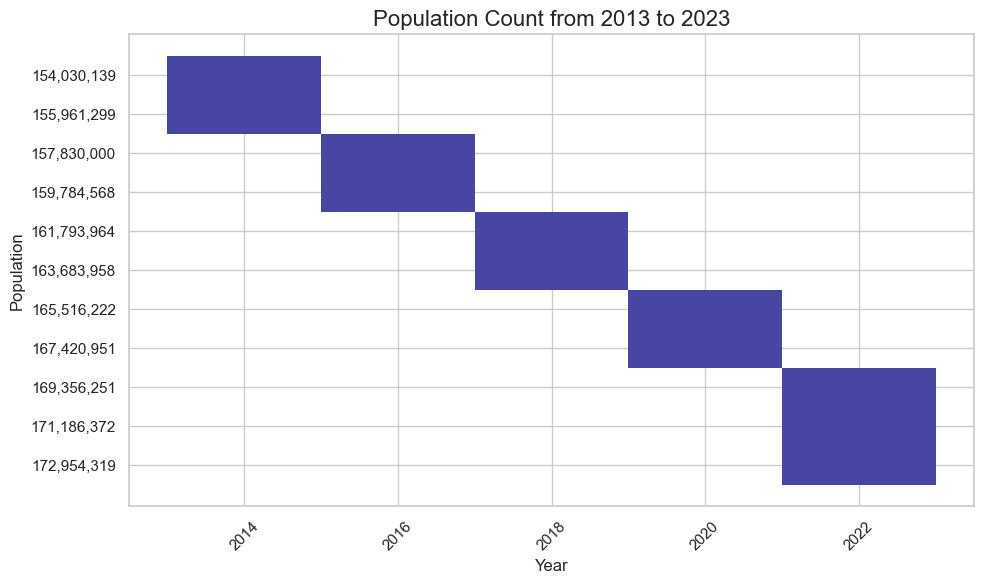

In [11]:
#total population
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a line plot for total population from 2013 to 2023
plt.figure(figsize=(10, 6))
sns.histplot(x='Year', y='Population', data=filtered_df,  color='blue')

# Add titles and labels
plt.title('Population Count from 2013 to 2023', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

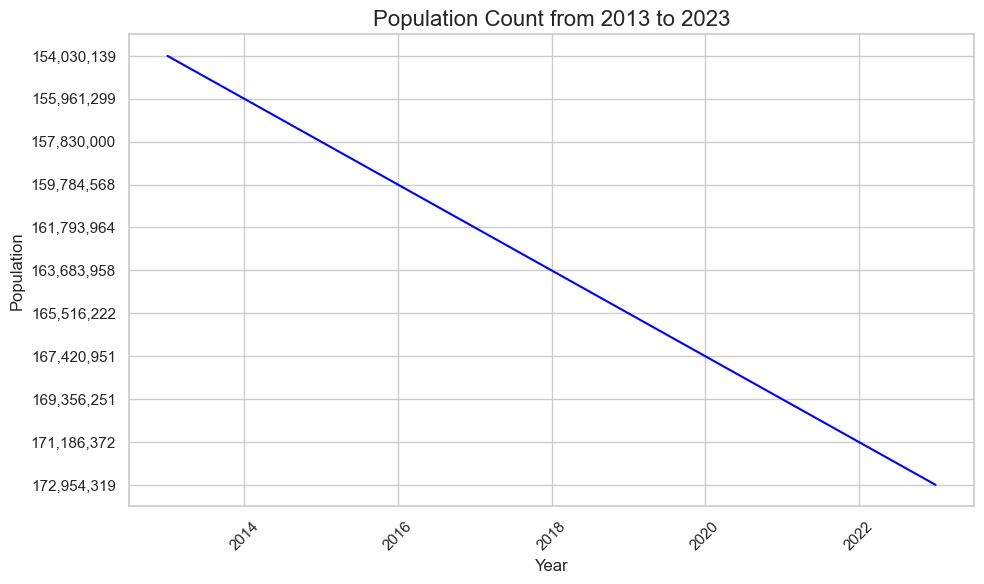

In [15]:
sns.set(style="whitegrid")
filtered_df = filtered_df.sort_values('Population')

# Create a line plot for total population from 2013 to 2023
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Population', data=filtered_df,  color='blue')

# Add titles and labels
plt.title('Population Count from 2013 to 2023', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

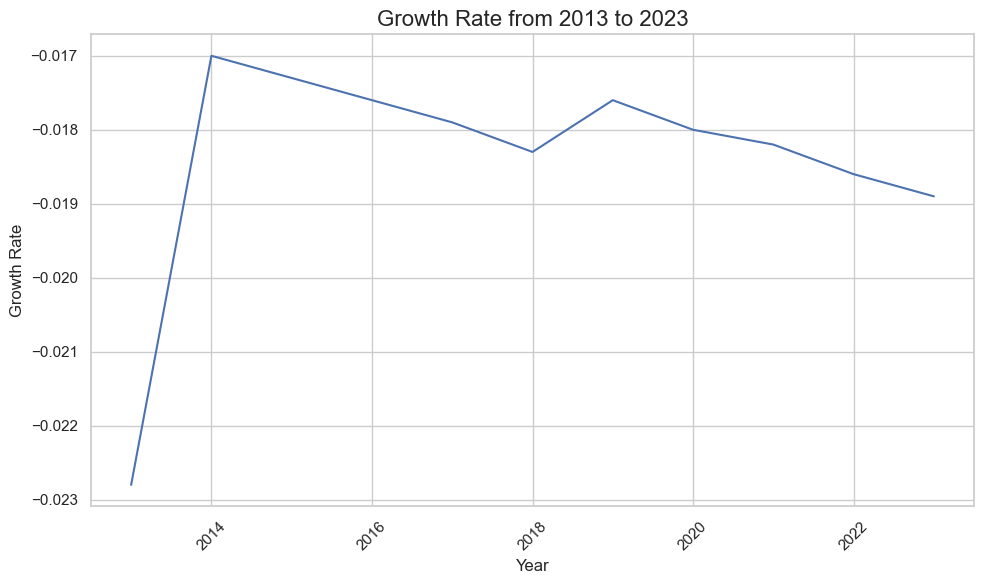

In [12]:
#growth rates
sns.set(style="whitegrid")

# Create a line plot for total population from 2013 to 2023
plt.figure(figsize=(10, 6))
sns.lineplot(data =filtered_df, x = 'Year', y ='Growth Rate.1' )

# Add titles and labels
plt.title('Growth Rate from 2013 to 2023', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()